In [2]:
import pandas as pd
import numpy as np

# Read downloaded data

In [5]:
mta_data = pd.read_csv("turnstile_170325.txt")

In [6]:
df1 = pd.read_csv("turnstile_170304.txt")
df2 = pd.read_csv("turnstile_170311.txt")
mta_data = pd.concat([df1,df2])

# Convert Date

In [7]:
from datetime import datetime
import dateutil.parser

def clean_datetime(row):
    date_string = row['DATE'] + ' ' + row['TIME']
    return dateutil.parser.parse(date_string)

In [8]:
mta_data['date_time'] = mta_data.apply(clean_datetime, axis=1)

In [9]:
def clean_date(x):
    return dateutil.parser.parse(x)

In [10]:
mta_data['date_parsed'] = mta_data['DATE'].apply(clean_date)

In [11]:
mta_data['Turnstile'] = mta_data['C/A'] + ' ' + mta_data['SCP'] 

In [12]:
mta_data_sorted = mta_data.sort_values(['Turnstile', 'date_parsed'], ascending=[True, True])
mta_data_sorted['Entries_next'] = mta_data_sorted['ENTRIES'].shift(-1)
mta_data_sorted['New_entries'] = mta_data_sorted['Entries_next'] - mta_data_sorted['ENTRIES']
mta_data_sorted['Turnstile_next'] = mta_data_sorted['Turnstile'].shift(-1)
mta_data_sorted['Turnstile_not_same'] = mta_data_sorted['Turnstile'] != mta_data_sorted['Turnstile_next']

In [13]:
mta_data_sorted = mta_data_sorted.query('Turnstile_not_same == False')

In [14]:
mta_data_sorted['Entries_next'] = mta_data_sorted['ENTRIES'].shift(-1)
mta_data_sorted['New_entries'] = mta_data_sorted['Entries_next'] - mta_data_sorted['ENTRIES']
mta_data_sorted['Turnstile_next'] = mta_data_sorted['Turnstile'].shift(-1)
mta_data_sorted['Turnstile_not_same'] = mta_data_sorted['Turnstile'] != mta_data_sorted['Turnstile_next'] 
mta_data_sorted = mta_data_sorted.query('Turnstile_not_same == False') 

In [15]:
mta_data_sorted = mta_data_sorted.query("DESC == 'REGULAR'").query('New_entries >= 0')

In [16]:
mta_data_agg = mta_data_sorted.pivot_table(index=['Turnstile', 'date_parsed'], 
                            values='New_entries',
                            aggfunc=np.sum).reset_index()
mta_data_agg.sort_values('date_parsed', ascending=False).drop_duplicates('Turnstile', keep='first')

,Turnstile,date_parsed,New_entries
65080,TRAM2 00-05-01,2017-03-10,0.0
4843,B019 00-00-00,2017-03-10,2017.0
27291,N333B 02-00-01,2017-03-10,1229.0
4857,B019 00-00-01,2017-03-10,1587.0
27305,N333B 02-00-02,2017-03-10,1625.0
27319,N333B 02-00-03,2017-03-10,2163.0
27333,N333B 02-01-00,2017-03-10,797.0
58245,R510 00-00-01,2017-03-10,749.0
27347,N333B 02-01-01,2017-03-10,421.0
27361,N333B 02-01-02,2017-03-10,383.0


In [17]:
date = mta_data_agg['date_parsed'][0]

# Exploratory Plots

In [18]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

In [19]:
turnstile = mta_data_agg['Turnstile'][0]

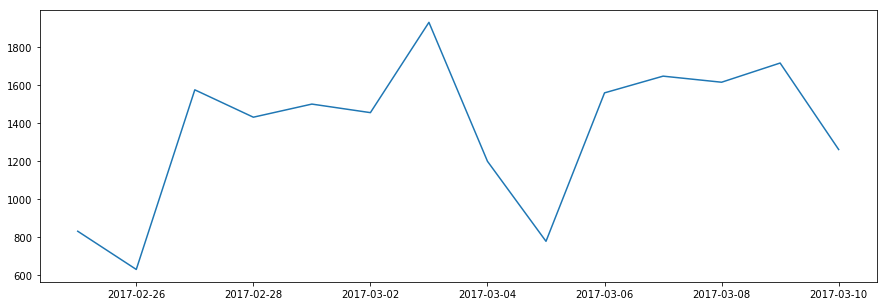

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

turnstile_data = mta_data_agg.query("Turnstile == @turnstile")
days = turnstile_data['date_parsed']
counts = turnstile_data['New_entries']
plt.figure(figsize=(15,5))
plt.plot(days,counts);

In [21]:
mta_data_agg_station = mta_data_agg.merge(mta_data[['Turnstile', 'STATION']].drop_duplicates(),
                                          how='left',
                                          on='Turnstile')

In [38]:
entries_by_station_date = mta_data_agg_station.pivot_table(index=['date_parsed', 'STATION'], 
                                    values='New_entries',
                                    aggfunc=np.sum).reset_index()
entries_by_station_date.head(2)

,date_parsed,STATION,New_entries
0,2017-02-25,1 AV,17508.0
1,2017-02-25,103 ST,5839.0


In [23]:
entries_by_station_date.describe()

,New_entries
count,5.245000e+03
mean,1.823144e+05
std,9.284489e+06
min,0.000000e+00
25%,3.664000e+03
50%,7.048000e+03
75%,1.495800e+04
max,6.517738e+08


In [34]:
station = entries_by_station_date['STATION'][0]
station = entries_by_station_date['STATION'][232]

In [35]:
def getIndex(name):
    index = 0
    for station in entries_by_station_date['STATION']:
        if station == name:
            return index
        else:
            index += 1

In [36]:
getIndex('GRD CNTRL-42 ST')

233

In [37]:
entries_by_station_date['STATION'][46]

'23 ST'

In [39]:
entries_by_station_date = entries_by_station_date.sort_values('date_parsed')

In [40]:
entries_by_station_date.head()

,date_parsed,STATION,New_entries
0,2017-02-25,1 AV,17508.0
254,2017-02-25,JAY ST-METROTEC,19693.0
253,2017-02-25,JAMAICA VAN WK,2664.0
252,2017-02-25,JAMAICA CENTER,19426.0
251,2017-02-25,JAMAICA 179 ST,8836.0


In [41]:
entries_by_station_date.head()

,date_parsed,STATION,New_entries
0,2017-02-25,1 AV,17508.0
254,2017-02-25,JAY ST-METROTEC,19693.0
253,2017-02-25,JAMAICA VAN WK,2664.0
252,2017-02-25,JAMAICA CENTER,19426.0
251,2017-02-25,JAMAICA 179 ST,8836.0


In [42]:
def weekday(x):
    return x.weekday()

In [43]:
entries_by_station_date.query('STATION == "23 ST"')

,date_parsed,STATION,New_entries
46,2017-02-25,23 ST,53299.0
420,2017-02-26,23 ST,35168.0
795,2017-02-27,23 ST,120341.0
1170,2017-02-28,23 ST,126994.0
1545,2017-03-01,23 ST,121064.0
1920,2017-03-02,23 ST,132725.0
2295,2017-03-03,23 ST,122957.0
2670,2017-03-04,23 ST,60182.0
3044,2017-03-05,23 ST,42697.0
3418,2017-03-06,23 ST,122971.0


# Presentation Plots

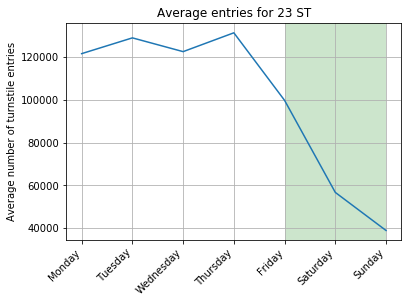

In [44]:
entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "23 ST"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = '45', ha = 'right')
plt.ylabel('Average number of turnstile entries')
plt.title('Average entries for 23 ST');

In [176]:
stationMap = ('23 ST','34 ST-HERALD SQ','14 ST-UNION SQ','34 ST-PENN STA','TIMES SQ-42 ST','42 ST-PORT AUTH','86 ST','FULTON ST','GRD CNTRL-42 ST','59 ST COLUMBUS')


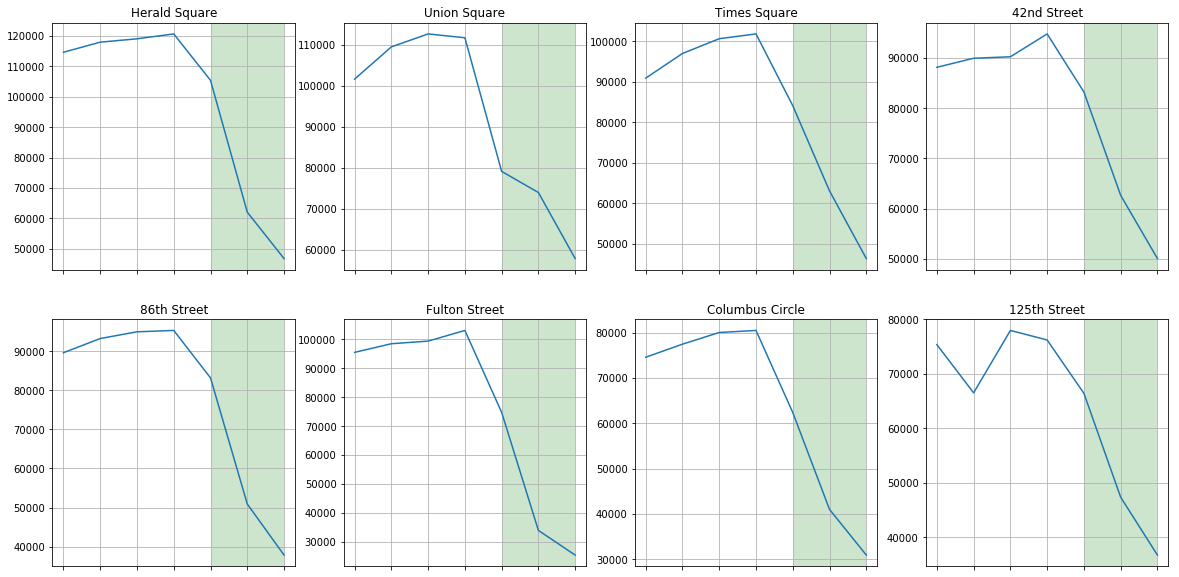

In [205]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "34 ST-HERALD SQ"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('Herald Square');

plt.subplot(2, 4, 2)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "14 ST-UNION SQ"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('Union Square');

plt.subplot(2, 4, 3)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "TIMES SQ-42 ST"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('Times Square');

plt.subplot(2, 4, 4)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "42 ST-PORT AUTH"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('42nd Street');

plt.subplot(2, 4, 5)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "86 ST"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('86th Street');

plt.subplot(2, 4, 6)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "FULTON ST"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('Fulton Street');

plt.subplot(2, 4, 7)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "59 ST COLUMBUS"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('Columbus Circle');

plt.subplot(2, 4, 8)

entries_by_station_date['weekday'] = entries_by_station_date['date_parsed'].apply(weekday)
entries_by_weekday = entries_by_station_date.query('STATION == "125 ST"').pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)
entries_by_weekday
plt.plot(entries_by_weekday.index,entries_by_weekday.values)
plt.axvspan(4, 6, color='g', alpha=0.2, lw=0)
plt.grid()
plt.xticks(range(7), ['','','','','','',''], rotation = '45', ha = 'right')
plt.ylabel('')
plt.title('125th Street');




In [45]:
entries_by_station_date[entries_by_station_date['New_entries'] > 150000] = 150000

In [46]:
entries_by_station_date.pivot_table(index='weekday',
                                    values='New_entries',
                                    aggfunc=np.mean)

weekday
0          14844.939597
1          15163.762735
2          15297.693548
3          15544.591946
4          13649.359626
5           8329.773458
6           6398.982644
150000    150000.000000
Name: New_entries, dtype: float64

In [47]:
entries_by_station_date

,date_parsed,STATION,New_entries,weekday
0,2017-02-25,1 AV,17508.0,5
254,2017-02-25,JAY ST-METROTEC,19693.0,5
253,2017-02-25,JAMAICA VAN WK,2664.0,5
252,2017-02-25,JAMAICA CENTER,19426.0,5
251,2017-02-25,JAMAICA 179 ST,8836.0,5
250,2017-02-25,JACKSON AV,3591.0,5
249,2017-02-25,INWOOD-207 ST,16353.0,5
248,2017-02-25,INTERVALE AV,2041.0,5
247,2017-02-25,HUNTS POINT AV,5470.0,5
246,2017-02-25,HUNTERS PT AV,1762.0,5


In [48]:
top_stations = entries_by_station_date.pivot_table(index='STATION', 
                                    values='New_entries', 
                                    aggfunc=np.mean).reset_index().sort_values('New_entries', ascending=False)

In [49]:
top_stations = top_stations[1:]

In [50]:
top_stations.head(20)

,STATION,New_entries
47,23 ST,100023.142857
60,34 ST-HERALD SQ,98055.142857
15,14 ST-UNION SQ,92361.000000
62,34 ST-PENN STA,90968.800000
351,TIMES SQ-42 ST,83425.642857
69,42 ST-PORT AUTH,79855.857143
111,86 ST,77834.714286
227,FULTON ST,75775.142857
234,GRD CNTRL-42 ST,68851.000000
87,59 ST COLUMBUS,63833.357143


In [51]:
from matplotlib import cm

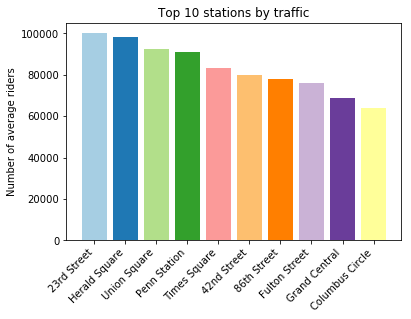

In [52]:
average_ridership_values = top_stations['New_entries'].values
indices = range(len(average_ridership_values[0:10]))
plt.bar(indices, average_ridership_values[0:10]);
axes = plt.axes()
cs  = cm.Paired(np.arange(10)/10)
plt.bar(indices, average_ridership_values[0:10], color=cs);
plt.xticks(range(10), ['23rd Street','Herald Square','Union Square','Penn Station','Times Square','42nd Street','86th Street', 'Fulton Street', 'Grand Central', 'Columbus Circle'], rotation = '45', ha = 'right')
plt.ylabel("Number of average riders")
plt.title("Top 10 stations by traffic");

In [134]:
average_ridership_values[0:10]

array([ 100023.14285714,   98055.14285714,   92361.        ,
         90968.8       ,   83425.64285714,   79855.85714286,
         77834.71428571,   75775.14285714,   68851.        ,
         63833.35714286])

### Pie Chart

[830984.0, 532921.0, 378458.0]


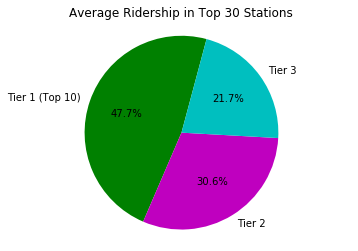

In [54]:
average_ridership_values = top_stations['New_entries'].values

top10_avg_sum = average_ridership_values[0:10].sum()
next10_avg_sum = average_ridership_values[10:20].sum()
rest_avg_sum = average_ridership_values[20:30].sum()

values = [round(top10_avg_sum), round(next10_avg_sum), round(rest_avg_sum)]
print(values)
labels = ['Tier 1 (Top 10)', 'Tier 2', 'Tier 3']
colors = ['g', 'm', 'c']

plt.pie(values, colors= colors, labels=labels, autopct='%1.1f%%', startangle=75)
plt.axis('equal')
plt.title('Average Ridership in Top 30 Stations')
plt.show()